In [127]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [86]:
data = pd.read_csv('./diabetes.csv')
data

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Class
0,6,148,72,35,0,33.6,50,positive
1,1,85,66,29,0,26.6,31,negative
2,8,183,64,0,0,23.3,32,positive
3,1,89,66,23,94,28.1,21,negative
4,0,137,40,35,168,43.1,33,positive
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,negative
764,2,122,70,27,0,36.8,27,negative
765,5,121,72,23,112,26.2,30,negative
766,1,126,60,0,0,30.1,47,positive


In [87]:
x = data.drop('Class',axis=1).values
y_string = data['Class'].to_list()

In [88]:
x.shape,len(y_string)

((768, 7), 768)

In [89]:
y_int = [1 if i == 'positive' else 0 for i in y_string]

In [90]:
y = np.array(y_int, dtype='float64')
y.dtype

dtype('float64')

In [91]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [92]:
x = torch.tensor(x)
y = torch.tensor(y)

In [93]:
x.shape, y.shape

(torch.Size([768, 7]), torch.Size([768]))

In [94]:
y = y.unsqueeze(1)
y.shape

torch.Size([768, 1])

In [98]:
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [99]:
dataset = Dataset(x,y)

In [100]:
len(dataset)

768

In [102]:
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                           batch_size=32,
                           shuffle=True)

In [116]:
f"There are {len(train_loader)} batches in the dataset."
for x,y in train_loader:
    print('for one iteration (batch), there is:')
    print(f'Data: {x.shape}')   
    print(f'Label: {y.shape}')
    break

for one iteration (batch), there is:
Data: torch.Size([32, 7])
Label: torch.Size([32, 1])


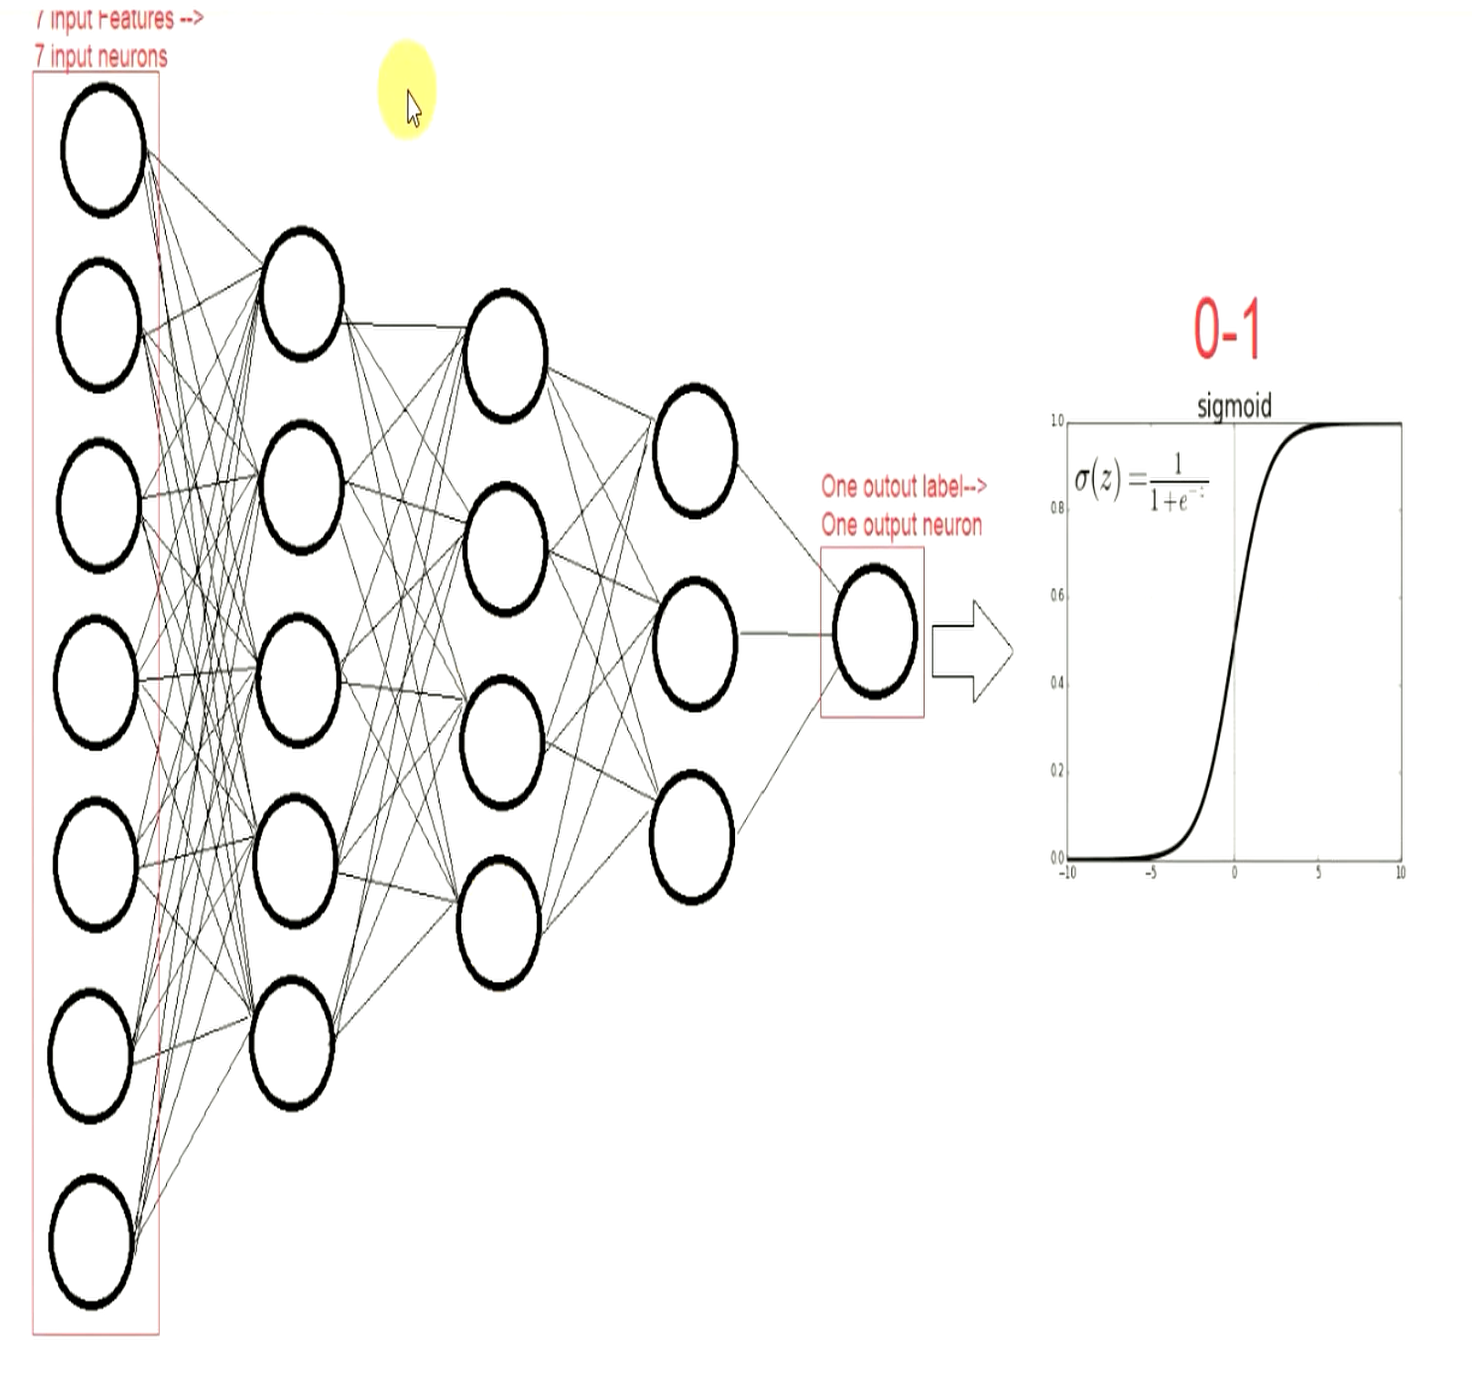

In [128]:
Image.open('./model.jpeg')

In [129]:
class Model(nn.Module):
    def __init__(self, input_features,out_features):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(input_features, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, out_features)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
    
    def forward(self,x):
        out = self.fc1(x) 
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [134]:
# create network
net = Model(7,1)
# loss function
criterion = nn.BCELoss(size_average=True)
# optimizer: we will use SGD with momentum with a learning rate of 0.1
optimizer = torch.optim.SGD(net.parameters(),lr=0.1,momentum=0.9)

In [142]:
#  Train the network
epochs = 200
for epoch in range(epochs):
    for inputs,labels in train_loader:
        inputs = inputs.float()
        labels = labels.float()
        #forward prop
        outputs = net(inputs)
        # we don't need to call net.forward() because in pytorch above line automatically called forward function.
        # loss calculation
        loss = criterion(outputs,labels)
        #clear the gradient buffer (w <-- w - lr*gradient)
        optimizer.zero_grad()
        # calculating gradient, back prop
        loss.backward()
        # update weights
        optimizer.step()
    # accuracy calculation
    output = (outputs>0.5).float()
    accuracy = (output == labels).float().mean()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")
        

Epoch 1/200, Loss: 0.657, Accuracy: 0.625
Epoch 2/200, Loss: 0.375, Accuracy: 0.844
Epoch 3/200, Loss: 0.536, Accuracy: 0.750
Epoch 4/200, Loss: 0.554, Accuracy: 0.781
Epoch 5/200, Loss: 0.420, Accuracy: 0.844
Epoch 6/200, Loss: 0.583, Accuracy: 0.750
Epoch 7/200, Loss: 0.546, Accuracy: 0.688
Epoch 8/200, Loss: 0.471, Accuracy: 0.750
Epoch 9/200, Loss: 0.361, Accuracy: 0.781
Epoch 10/200, Loss: 0.499, Accuracy: 0.719
Epoch 11/200, Loss: 0.673, Accuracy: 0.625
Epoch 12/200, Loss: 0.337, Accuracy: 0.844
Epoch 13/200, Loss: 0.364, Accuracy: 0.844
Epoch 14/200, Loss: 0.427, Accuracy: 0.781
Epoch 15/200, Loss: 0.583, Accuracy: 0.688
Epoch 16/200, Loss: 0.417, Accuracy: 0.812
Epoch 17/200, Loss: 0.377, Accuracy: 0.812
Epoch 18/200, Loss: 0.682, Accuracy: 0.625
Epoch 19/200, Loss: 0.383, Accuracy: 0.812
Epoch 20/200, Loss: 0.325, Accuracy: 0.906
Epoch 21/200, Loss: 0.405, Accuracy: 0.781
Epoch 22/200, Loss: 0.428, Accuracy: 0.844
Epoch 23/200, Loss: 0.287, Accuracy: 0.875
Epoch 24/200, Loss: 

Epoch 192/200, Loss: 0.391, Accuracy: 0.812
Epoch 193/200, Loss: 0.309, Accuracy: 0.844
Epoch 194/200, Loss: 0.363, Accuracy: 0.812
Epoch 195/200, Loss: 0.262, Accuracy: 0.906
Epoch 196/200, Loss: 0.565, Accuracy: 0.688
Epoch 197/200, Loss: 0.352, Accuracy: 0.906
Epoch 198/200, Loss: 0.480, Accuracy: 0.781
Epoch 199/200, Loss: 0.405, Accuracy: 0.781
Epoch 200/200, Loss: 0.364, Accuracy: 0.844
